# Group Randomizer


The "Group Randomizer" program is an application designed to manage and randomizer lists of names, primarily for group creation or random name selection.

# grouprandomizer.py

In [1]:
import random

class RandomizerBase:
    def __init__(self, items):
        self.items = items

    def validate_items(self):
        if not self.items:
            raise ValueError("No names provided!")

class GroupRandomizer(RandomizerBase):
    def __init__(self, items):
        super().__init__(items)

    def create_groups(self, num_groups):
        self.validate_items()
        if num_groups <= 0 or num_groups > len(self.items):
            raise ValueError("Invalid number of groups!")
        
        random.shuffle(self.items)
        groups = {f"Group {i + 1}": [] for i in range(num_groups)}
        
        for i, name in enumerate(self.items):
            groups[f"Group {(i % num_groups) + 1}"].append(name)
        
        return groups

    def pick_random_name(self):
        self.validate_items()
        return random.choice(self.items)


# ui.grprndmzr.py

In [ ]:
import tkinter as tk
from tkinter import messagebox
from Randomizer.grouprandomizer import GroupRandomizer

class RandomizerGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Group Randomizer")
        self.root.configure(bg="gray7")
        self.root.geometry("800x700")

        self.label_font = ("Helvetica", 18, "bold")
        self.entry_font = ("Helvetica", 16)
        self.button_font = ("Helvetica", 16, "bold")
        self.result_font = ("Helvetica", 14)

        self.frame = tk.Frame(root, bg="gray7")
        self.frame.pack(expand=True, anchor="center")

        # Title Label
        self.label_names = tk.Label(self.frame, text="Name Group Randomizer",
                                    font=("Courier", 22, "bold italic"), bg="gray7", fg="khaki2",
                                    padx=20, pady=10, highlightbackground="khaki3",
                                    highlightthickness=4)
        self.label_names.pack(pady=30)

        # Frame containing both the text widget and its scrollbar
        self.names_frame = tk.Frame(self.frame, bg="gray7")
        self.names_frame.pack(pady=5)

        # Text Widget for Names
        self.text_names = tk.Text(self.names_frame, font=self.entry_font, bg="khaki2", fg="gray7", height=8, width=60, wrap=tk.WORD)
        self.text_names.pack(side="left", fill="both", expand=True)

        # Scrollbar for Names Entry
        self.scrollbar_names = tk.Scrollbar(self.names_frame, orient="vertical", command=self.text_names.yview)
        self.scrollbar_names.pack(side="right", fill="y")

        # Configure the scrollbar to scroll with the text widget
        self.text_names.config(yscrollcommand=self.scrollbar_names.set)

        # Groups Entry
        self.label_groups = tk.Label(self.frame, text="Number of Groups:", font=self.label_font, bg="gray7", fg="khaki2")
        self.label_groups.pack(pady=10)

        self.entry_groups = tk.Entry(self.frame, font=self.entry_font, bg="khaki2", fg="gray7", width=10, justify="center")
        self.entry_groups.pack(pady=5)

        # Buttons
        self.button_frame = tk.Frame(self.frame, bg="gray7")
        self.button_frame.pack(pady=20)

        self.button_generate = tk.Button(self.button_frame, text="Generate Groups",
                                         font=self.button_font, bg="khaki2", fg="gray7", command=self.generate_groups)
        self.button_generate.pack(side="left", padx=10)

        self.button_pick = tk.Button(self.button_frame, text="Pick Random Name",
                                     font=self.button_font, bg="khaki2", fg="gray7", command=self.pick_random_name)
        self.button_pick.pack(side="left", padx=10)
        
        #Clear
        self.clear_button = tk.Button(
        self.button_frame, text="Clear Last Name", font=self.button_font, bg="khaki2", fg="gray12", command=self.clear_last_word)
        self.clear_button.pack(side="left", padx=10)

        self.clear_all_button = tk.Button(
        self.button_frame, text="Clear All", font=self.button_font, bg="khaki2", fg="gray12", command=self.clear_all)
        self.clear_all_button.pack(side="left", padx=10)

        # Random Name Label
        self.random_name_label = tk.Label(self.frame, text="", font=("Helvetica", 16, "italic"), bg="gray7", fg="khaki1")
        self.random_name_label.pack(pady=20)
        
       # Frame for results and scrollbar
        self.result_frame = tk.Frame(self.frame, bg="gray7")
        self.result_frame.pack(fill="both", expand=True, pady=10)

      # Results Display
        self.result_display = tk.Text(self.result_frame, font=self.result_font, bg="khaki2", fg="gray7", height=35, width=60,
                            wrap=tk.WORD)
        self.result_display.pack(side="left", fill="both", expand=True)

        # Scrollbar for results
        self.scrollbar_results = tk.Scrollbar(self.result_frame, orient="vertical", command=self.result_display.yview)
        self.scrollbar_results.pack(side="right", fill="y")

        # Configure the scrollbar to scroll with the text widget
        self.result_display.config(yscrollcommand=self.scrollbar_results.set)

    def center_text_in_textbox(self, event=None):
        self.text_names.tag_configure("center", justify="center")
        self.text_names.tag_add("center", "1.0", "end")

    def get_names(self):
        names = self.text_names.get("1.0", tk.END).strip().split(',')
        names = [name.strip() for name in names if name.strip()]
        return names

    def generate_groups(self):
        try:
            names = self.get_names()
            num_groups = int(self.entry_groups.get())
            group_randomizer = GroupRandomizer(names)
            groups = group_randomizer.create_groups(num_groups)
            self.display_result(groups)
        except ValueError as e:
            messagebox.showerror("Input Error", str(e))

    def pick_random_name(self):
        try:
            names = self.get_names()
            group_randomizer = GroupRandomizer(names)
            random_name = group_randomizer.pick_random_name()
            self.random_name_label.config(text=f"Picked Name: {random_name}")
        except ValueError as e:
            messagebox.showerror("Input Error", str(e))

    def display_result(self, groups):
        self.result_display.config(state="normal")
        self.result_display.delete("1.0", tk.END)
        for group, members in groups.items():
            self.result_display.insert(tk.END, f"{group}: {', '.join(members)}\n")
        self.result_display.config(state="disabled")
        
        #Clear
    def clear_last_word(self):
        current_text = self.text_names.get("1.0", tk.END).strip()
        if current_text:
            words = current_text.split(',')
            updated_text = ', '.join(words[:-1]).strip()
            self.text_names.delete("1.0", tk.END)
            self.text_names.insert("1.0", updated_text)

    def clear_all(self):
        self.text_names.delete("1.0", tk.END)
        self.entry_groups.delete(0, tk.END)
        self.random_name_label.config(text="")
        self.result_display.config(state="normal")  
        self.result_display.delete("1.0", tk.END)  
        self.result_display.config(state="disabled")

# Screenshots
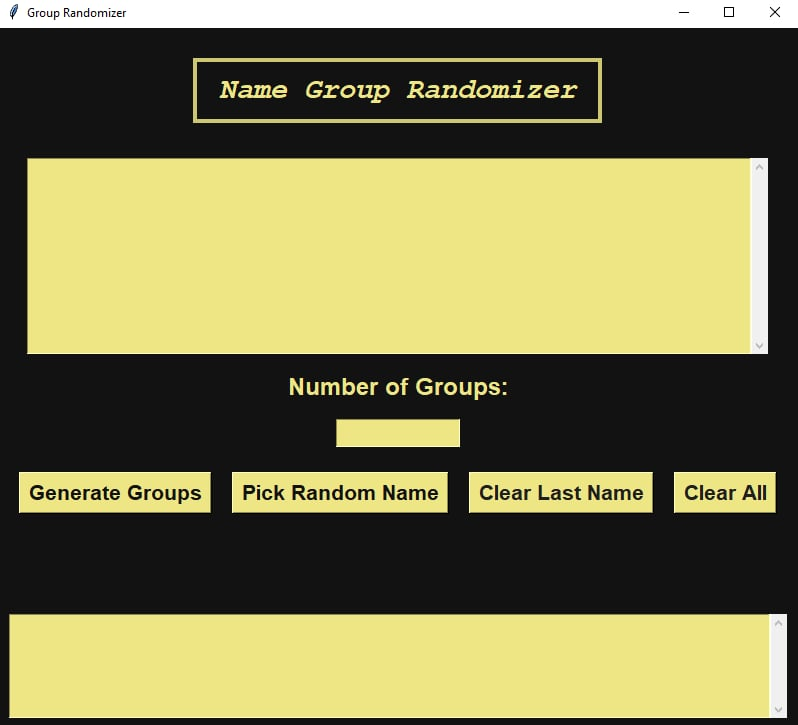
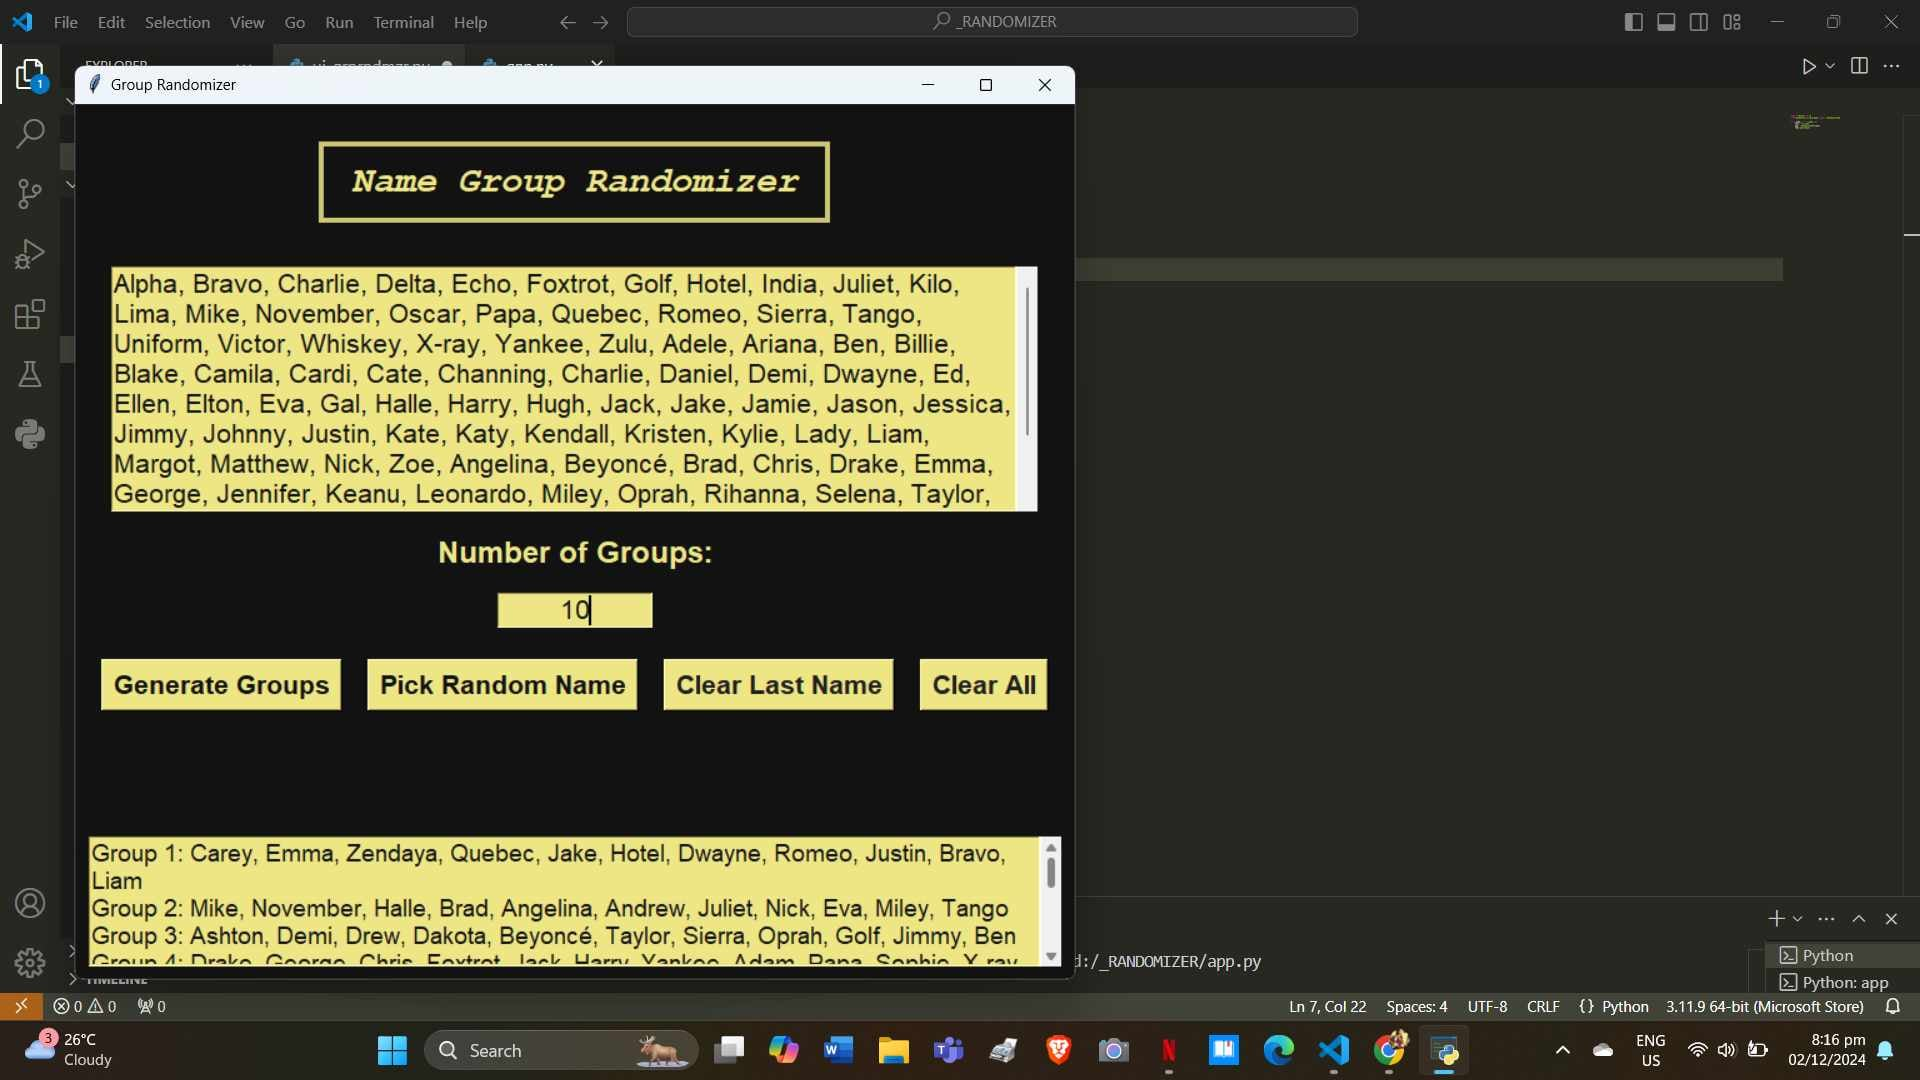
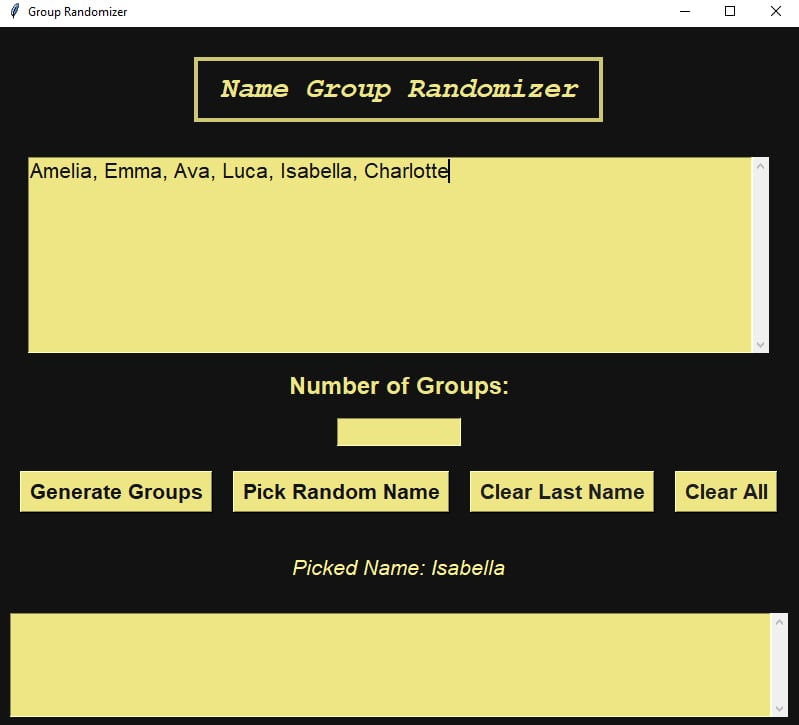
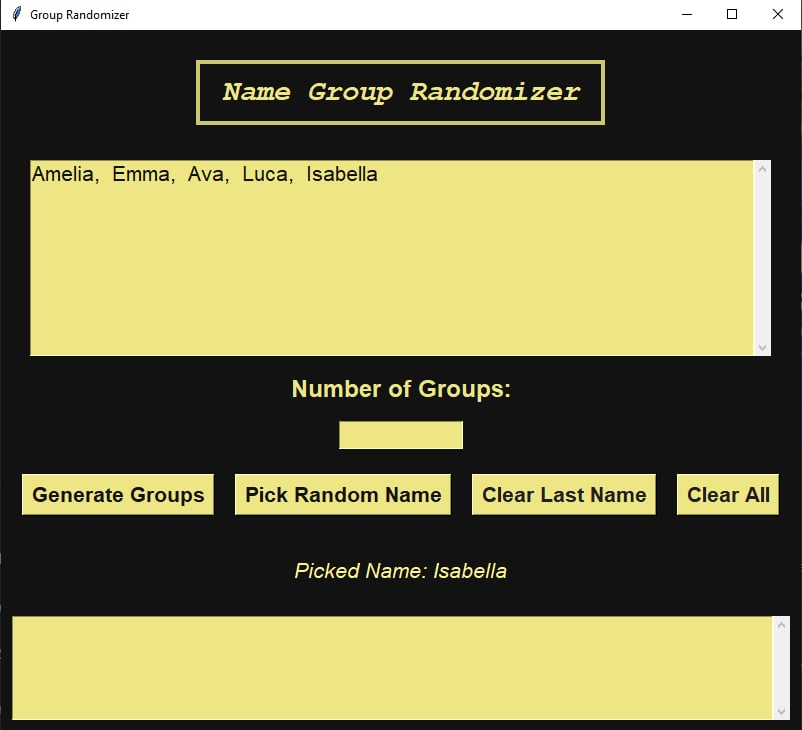
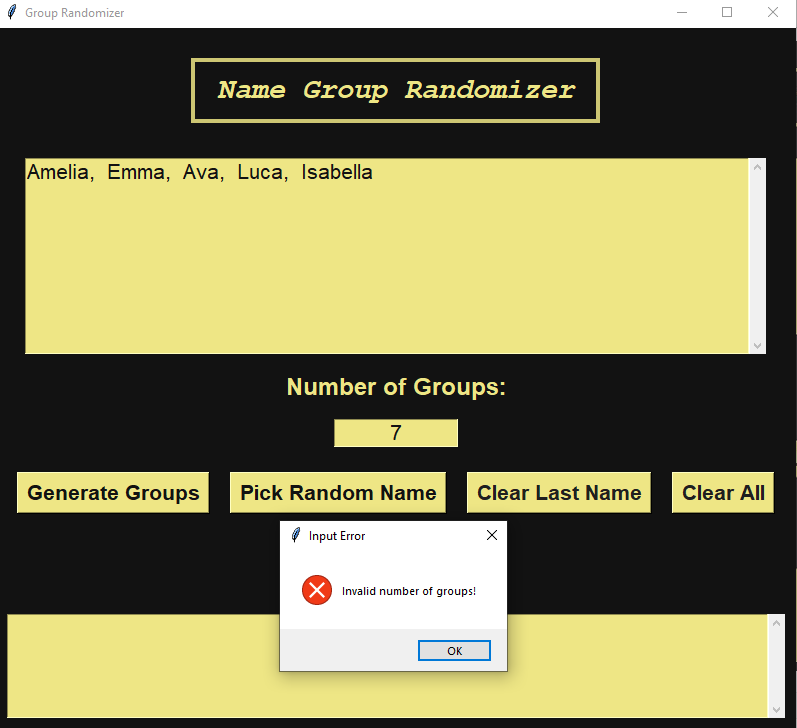
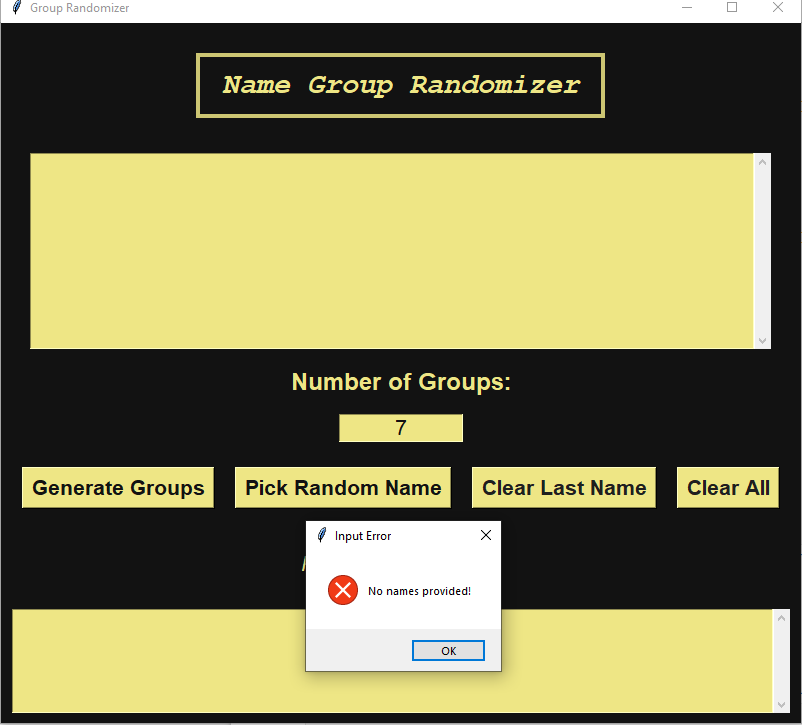

